# Machine Learning - Titanic Problem

Let's first import some standard libraries for data processing and visualization


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
train_data_frame = pd.read_csv("./data/train.csv")
test_data_frame = pd.read_csv("./data/test.csv")

train_data_frame.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Preprocess Data
Let's filter the data to remove any noise

In [18]:
def pre_process(data_frame: pd.DataFrame) -> pd.DataFrame:
    data_frame.drop(['Ticket', 'PassengerId'], axis = 1)
    data_frame.Cabin.fillna('Unknown', inplace = True) # Replace NaN with "Unknown"
    data_frame.Embarked.fillna('Unknown', inplace = True)

    cols = ['SibSp', 'Parch', 'Fare', 'Age']
    for col in cols:
        data_frame[col].fillna(data_frame[col].median(), inplace = True)

    data_frame['Sex'].replace({"female": 1, "male": 0}, inplace=True)
    
    return data_frame


In [19]:
train_data_frame = pre_process(train_data_frame)
test_data_frame = pre_process(test_data_frame)

train_data_frame.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,Unknown,C


Let's look at the data through some visualizations and see if there's anything immediately obvious.

<AxesSubplot:>

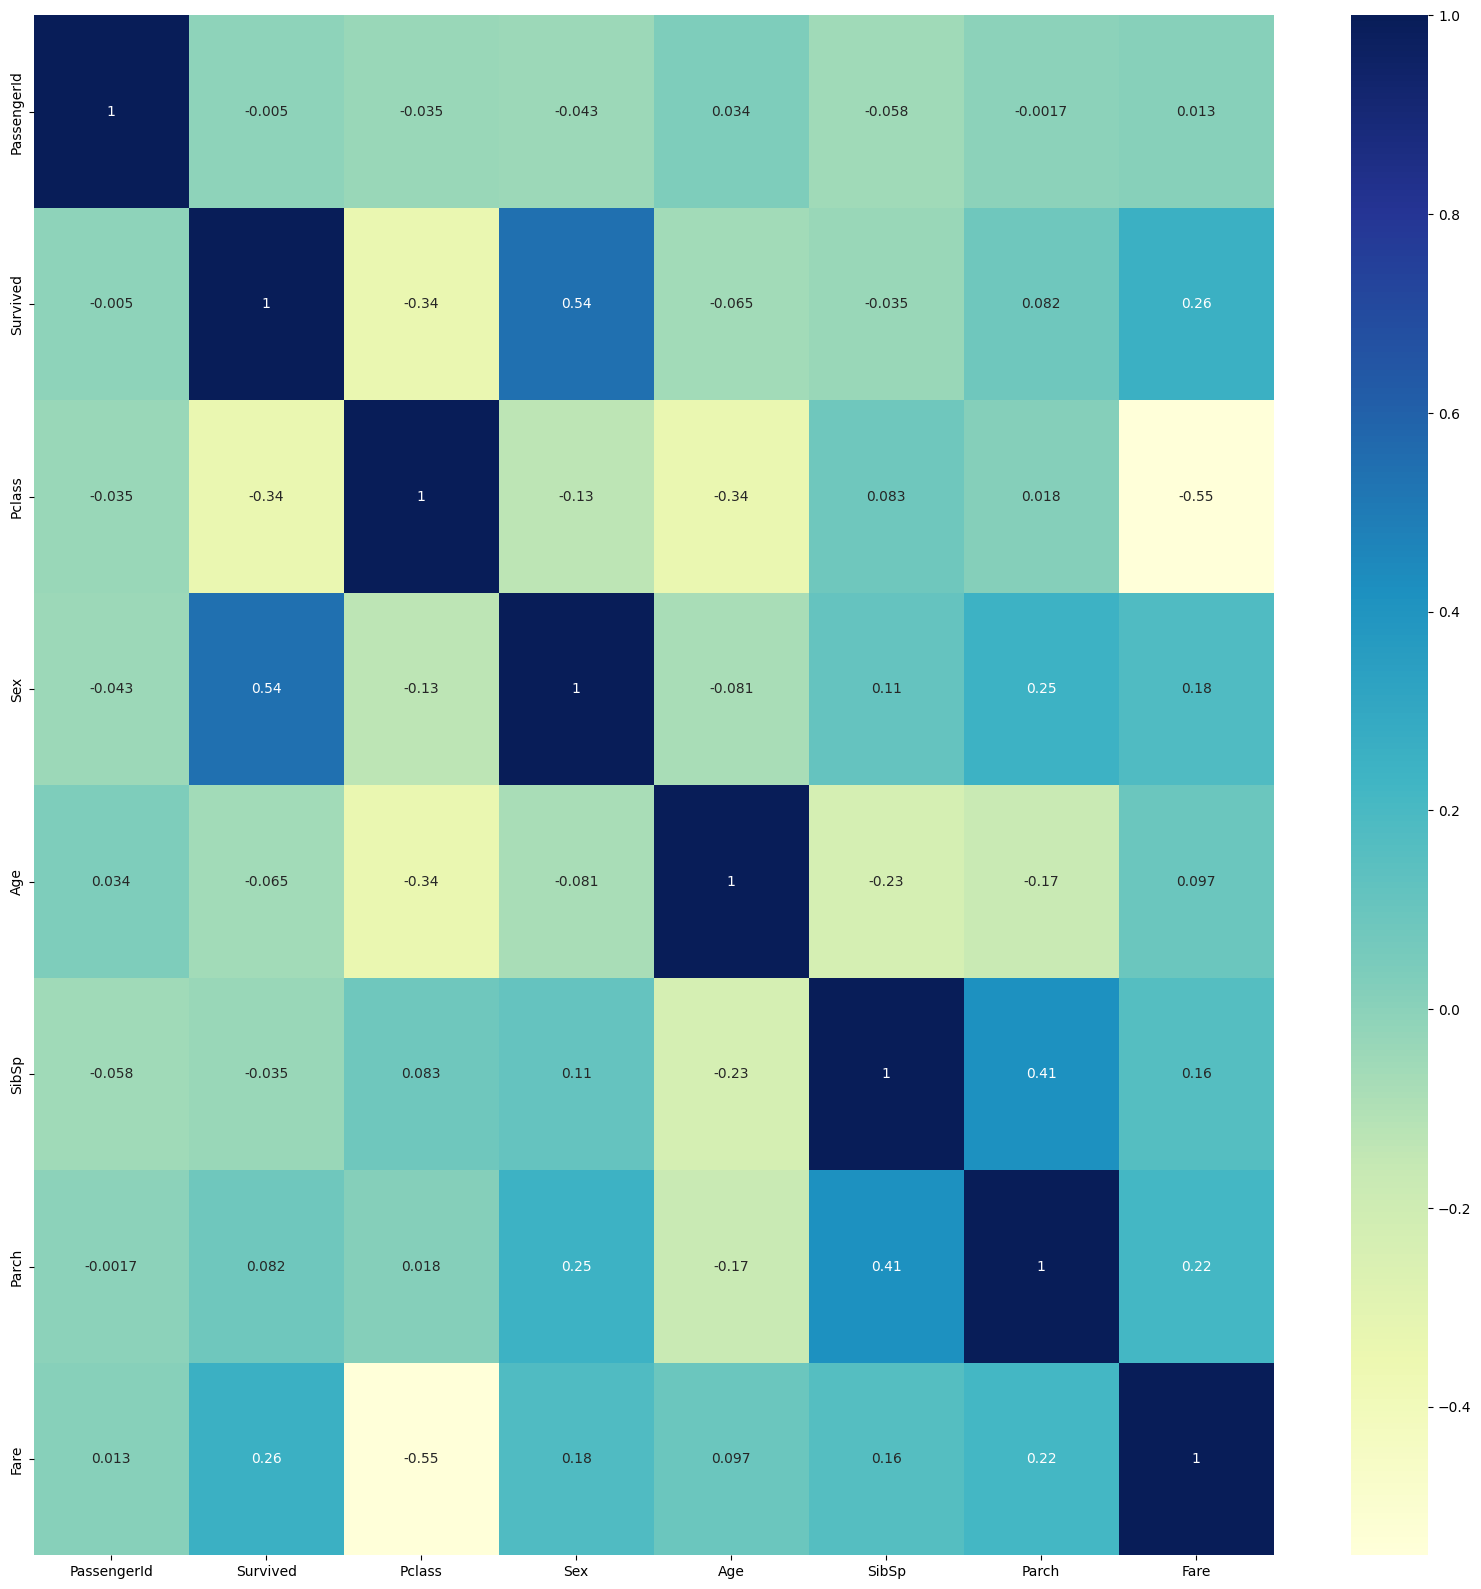

In [20]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(train_data_frame.corr(), cmap = 'YlGnBu', annot=True, ax=ax)

Based on the heatmap above, it appears that the most clear correlation between a person's chance of survival is based upon their gender and their fare. From their we can see what constitutes the majority of those respective categories as well.